Data Structures and Algorithms Assignment I 

Anil Vercruysse ID 22202474

The first part of this notebook implements the tasks I, II, and III. 

The second part of this notebook consists of a report discussing the results of the implemented experiments. 

Task I - Pseudocode for factorial of positive integer n

In [2]:
# function fact(n)
#     if n is 0 or 1 
#         return 1
#     else
#         var = 1
#         for i in range 2 to n 
#             var = var * i 
#         return var

Task II - Factorial functions

In [6]:
# (i) Iterative factorial 

def it_fact(n):
    if n == 0 or n == 1:
        return 1
    else:
        var = 1
        for i in range(2, n + 1):
            var *= i
        return var


# (ii) Tail-recursive factorial

# accumulator to keep track of products
def tr_fact(n, acc=1):
    if n == 0 or n ==1: 
        return acc
    else:
# n-1 since we calculate n times the factorial of n-1
        return tr_fact(n-1, acc*n)


# (iii) Non-tail recursive factorial 

def ntr_fact(n): 
    if n == 0 or n == 1:
        return 1
    else: 
        return n * ntr_fact(n-1)

Task II - Running time

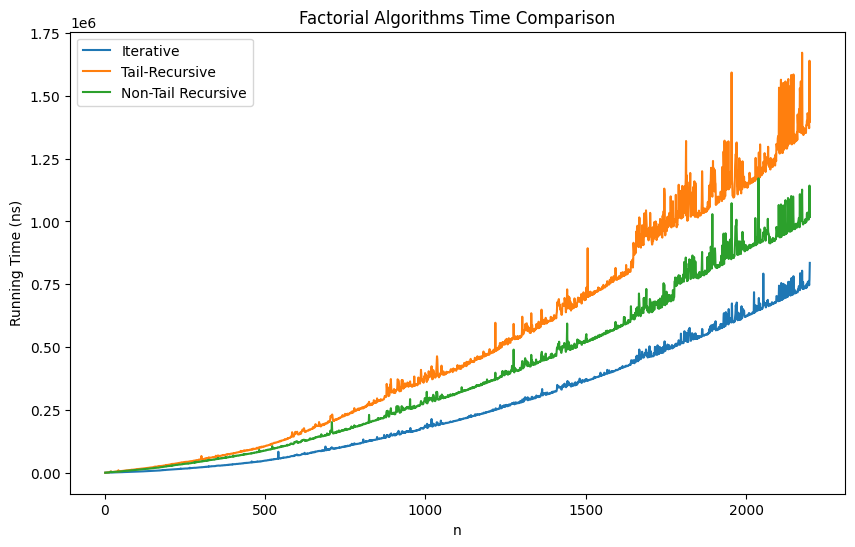

In [50]:
# https://docs.python.org/3/library/timeit.html
import timeit
import matplotlib.pyplot as plt
import sys
# https://www.geeksforgeeks.org/python-sys-setrecursionlimit-method/ 
sys.setrecursionlimit(10000)  # change the recursion limit 

# function to measure the average elapsed time of a given function with input value n
def measure_average_elapsed_time(func, n, runs=50):
    total_time = 0
    timer = timeit.Timer(lambda: func(n)) # timer object to measure the elapsed time
    for _ in range(runs):
        elapsed_time = timer.timeit(number=1) # measure the elapsed time and update the total_time variable
        total_time += elapsed_time
    return (total_time / runs) * 1e9  # converting to nanoseconds and calculate the average

input_values = list(range(1, 2200))  # empty list of input values to test the factorial functions
iterative_runtimes = []  
tail_recursive_runtimes = []  
non_tail_recursive_runtimes = []  

# For each input value, measure the time of eac function and store the results in the runtimes list
for n in input_values:
    iterative_runtimes.append(measure_average_elapsed_time(it_fact, n))
    tail_recursive_runtimes.append(measure_average_elapsed_time(tr_fact, n))
    non_tail_recursive_runtimes.append(measure_average_elapsed_time(ntr_fact, n))

# Plot the running time as a function of n for each algorithm
plt.figure(figsize=(10, 6))
plt.plot(input_values, iterative_runtimes, label='Iterative')  # iterative factorial 
plt.plot(input_values, tail_recursive_runtimes, label='Tail-Recursive')  # tail-recursive factorial
plt.plot(input_values, non_tail_recursive_runtimes, label='Non-Tail Recursive')  # non-tail-recursive factorial
plt.xlabel('n')  
plt.ylabel('Running Time (ns)')  
plt.title('Factorial Algorithms Time Comparison')  
plt.legend()  
plt.show()  

Task III - Search algorithmns

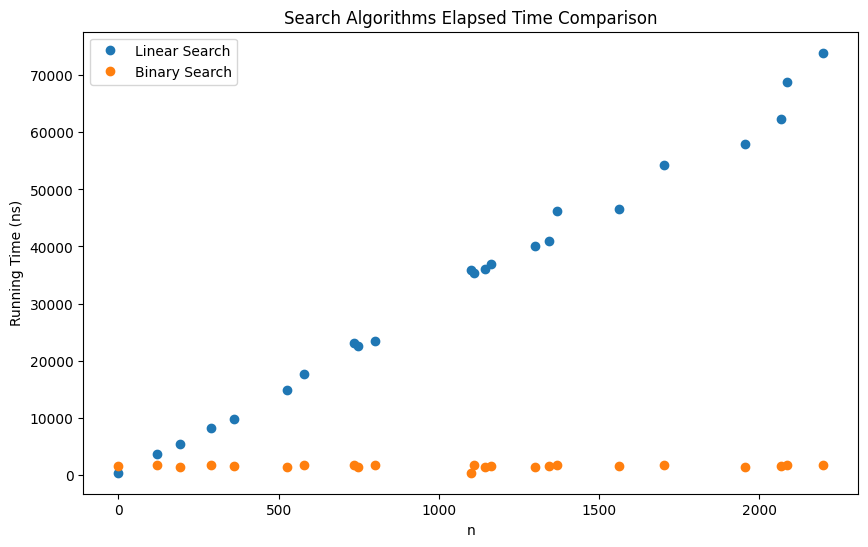

Linear Search Best Time: 348.00 ns
Linear Search Worst Time: 73962.00 ns
Binary Search Best Time: 366.00 ns
Binary Search Worst Time: 1766.00 ns


In [63]:
import numpy as np

# define the linear search algorithm
# https://www.geeksforgeeks.org/python-program-for-linear-search/
def linear_search(arr, target):
    for i, value in enumerate(arr):
        if value == target:
            return i
    return -1

# define the binary search algorithm (iterative)
# https://www.geeksforgeeks.org/python-program-for-binary-search/ 
def binary_search(arr, target):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1
    return -1

# using the sequence obtained from task 2 as an input
arr = input_values
arr.sort()

# select a list of indices to search for
search_indices = [0, len(arr) // 2, len(arr) - 1] + np.random.randint(0, len(arr), 20).tolist()

# Measure the elapsed time of each search algorithm for each search index
linear_times = []
binary_times = []

for i in search_indices:
    target = arr[i]
    linear_time = measure_elapsed_time(linear_search, arr, target)
    binary_time = measure_elapsed_time(binary_search, arr, target)

    linear_times.append(linear_time)
    binary_times.append(binary_time)

# Plot the running time as a function of n for each algorithm and compare the results
plt.figure(figsize=(10, 6))
plt.plot(search_indices, linear_times, 'o', label='Linear Search')
plt.plot(search_indices, binary_times, 'o', label='Binary Search')
plt.xlabel('n')  
plt.ylabel('Running Time (ns)')  
plt.title('Search Algorithms Elapsed Time Comparison')  
plt.legend()  
plt.show()  

# computes the best and worst running times for each search algorithm
linear_best = min(linear_times)
linear_worst = max(linear_times)
binary_best = min(binary_times)
binary_worst = max(binary_times)

print("Linear Search Best Time: {:.2f} ns".format(linear_best))
print("Linear Search Worst Time: {:.2f} ns".format(linear_worst))
print("Binary Search Best Time: {:.2f} ns".format(binary_best))
print("Binary Search Worst Time: {:.2f} ns".format(binary_worst))

Task III - Curve fitting

Linear Search Fitted Parameters: a = 32.17, b = -967.89
Binary Search Fitted Parameters: a = -2.06, b = 1526.76


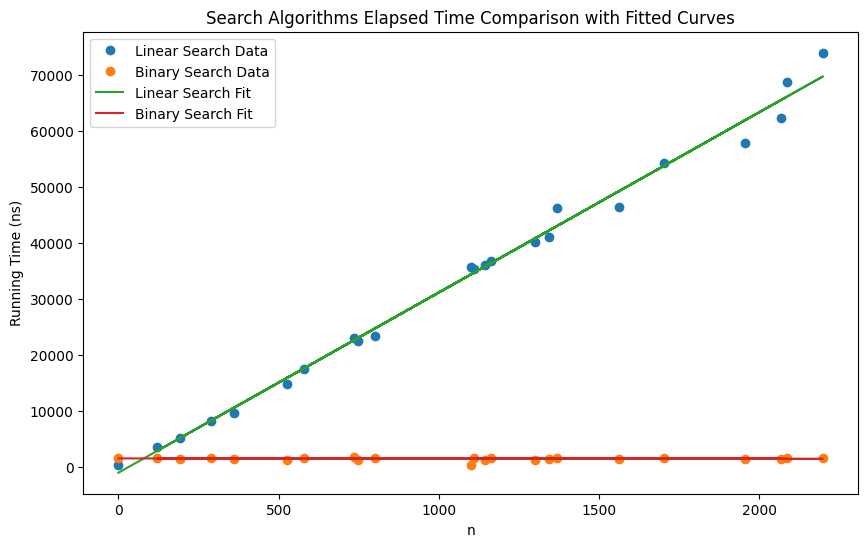

In [64]:
from scipy.optimize import curve_fit

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html 

#  linear function for the linear search running time
def linear_func(x, a, b):
    return a * x + b

# logarithmic function for the binary search running time
def log_func(x, a, b):
    return a * np.log2(x + 1e-9) + b # add tiny value to prevent division by zero error

# curve fitting for the linear search algorithm
linear_params, linear_cov = curve_fit(linear_func, search_indices, linear_times)

# curve fitting for the binary search algorithm
binary_params, binary_cov = curve_fit(log_func, search_indices, binary_times)

# Print the fitted parameters 
print("Linear Search Fitted Parameters: a = {:.2f}, b = {:.2f}".format(linear_params[0], linear_params[1]))
print("Binary Search Fitted Parameters: a = {:.2f}, b = {:.2f}".format(binary_params[0], binary_params[1]))

# Plot the fitted curves 
plt.figure(figsize=(10, 6))
plt.plot(search_indices, linear_times, 'o', label='Linear Search Data')
plt.plot(search_indices, binary_times, 'o', label='Binary Search Data')
plt.plot(search_indices, linear_func(np.array(search_indices), *linear_params), label='Linear Search Fit')
plt.plot(search_indices, log_func(np.array(search_indices), *binary_params), label='Binary Search Fit')
plt.xlabel('n')
plt.ylabel('Running Time (ns)')
plt.title('Search Algorithms Elapsed Time Comparison with Fitted Curves')
plt.legend()
plt.show()

DSA Report - Analysis of Algorithm Complexities and Performance

1. Introduction

This report presents the results of my analysis of the following algorithms: iterative, tail-recursive, and non-tail-recursive factorial algorithms, as well as linear and binary search algorithms. The algorithms are compared in terms of their time complexity and their efficiency. The experiments conducted by implementing tasks (i) to (iii) demonstrate the performance of each algorithm as the input size grows, and the results are discussed in terms of their respective complexities.


2. Task II: Factorial Algorithms

Three different factorial algorithms were implemented: iterative, tail-recursive, and non-tail-recursive. The algorithms were executed for a large range of input values of n, and their average runtimes were recorded. The range was set from 1 to 2200 as this was the limit for my computer system. The running time was plotted as a function of n for each algorithm, and the results were compared to the expected complexity of each algorithm.

The results indicate that the iterative algorithm was the fastest, the non-tail recursive algorithm was in the middle, and the tail-recursive algorithm was the slowest. This is consistent with the theoretical complexity of the algorithms: the iterative and non-tail-recursive approaches have a time complexity of O(n), while the tail-recursive algorithm's complexity is more varied.

3. Task III: Search Algorithms

A linear search algorithm and an iterative binary search algorithm were implemented. The algorithms were executed multiple times for various search values, and their performance times were stored. The best and worst running times for each algorithm were computed, and the running time was plotted as a function of n.

The binary search algorithm was extremely fast and almost aligned with the x-axis, with y-values (running time) close to 0. In contrast, the linear search algorithm's running time increased diagonally and proportionally with the value of n. This is consistent with the expected time complexities of the linear search (O(n)) and the binary search (O(log n)).

The best and worst times for the algorithms are listed below: 

- Linear Search Best Time: 348.00 ns
- Linear Search Worst Time: 73962.00 ns
- Binary Search Best Time: 366.00 ns
- Binary Search Worst Time: 1766.00 ns

The curves obtained from curve fitting have confirmed these findings, with the binary search being almost horizontal on y=0, and the linear search exhibiting a straight line going diagonally upwards. The fitted parameters (values that represent the equation of the curve) for linear search were a=32.17 and b=-967.89, while for binary search, they were a=-2.06 and b=1526.76.

4. Conclusion

The results obtained from the experiments confirm the expected complexities of my algorithms. The iterative factorial algorithm performs better than the tail-recursive and non-tail-recursive algorithms, which is consistent with their O(n) complexity. Similarly, the binary search algorithm's performance aligns with its expected O(log n) complexity, significantly outperforming the linear search algorithm with an O(n) complexity, as confirmed by their fitted curves.

The linear search fitted parameters, a = 32.17 and b = -967.89, indicate a linear relationship between the input size and the running time, as expected. On the other hand, the binary search fitted parameters, a = -2.06 and b = 1526.76, suggest a more logarithmic relationship, which is consistent with its O(log n) complexity.

Overall, the experiments conducted demonstrated the importance of considering algorithmic complexity and performance when selecting and designing algorithms. The performance of an algorithm can have a significant impact on the efficiency of software systems, and it is essential to choose the appropriate algorithm for a specific task.

5. Sources

- Chivers, Ian, et al. "An introduction to Algorithms and the Big O Notation." Introduction to Programming with Fortran: With Coverage of Fortran 90, 95, 2003, 2008 and 77 (2015): 359-364.

- Parmar, Vimal P., and C. K. Kumbharana. "Comparing linear search and binary search algorithms to search an element from a linear list implemented through static array, dynamic array and linked list." International Journal of Computer Applications 121.3 (2015).

- https://web.stanford.edu/class/archive/cs/cs106b/cs106b.1206/lectures/big-o/#:~:text=Big%2DO%20notation%20describes%20the,in%20terms%20of%20simpler%20functions.